<a href="https://colab.research.google.com/github/varunkumarjay/Deep-learning-lab-/blob/main/deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

single perceptron, binary classification for iris dataset, for only one flower (flower choosen setosa)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = (iris.target == 0).astype(np.int32)  # Binary target: 1 for Setosa, 0 for Not Setosa

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, z):
        """Step activation function."""
        return np.heaviside(z, 0).astype(int)

    def fit(self, X, y):
        """Train the perceptron using the dataset."""
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(len(X)):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        """Predict outputs for the given inputs."""
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate the perceptron
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Setosa", "Setosa"]))


single layer perceptron using iris dataset


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use the first two features (sepal length and sepal width)

def prepare_target(target_class):
    """Prepare binary target for the given class."""
    return (iris.target == target_class).astype(np.int32)

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, z):
        return np.heaviside(z, 0)  # Step activation function

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(len(X)):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

# Define the target classes
classes = ["Setosa", "Versicolor", "Virginica"]

# Loop through each class and train a perceptron
for class_idx, class_name in enumerate(classes):
    print(f"\n--- Binary Classification for {class_name} vs Not {class_name} ---")

    # Prepare binary targets
    y = prepare_target(class_idx)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

    # Initialize and train the perceptron
    perceptron = Perceptron(learning_rate=0.01, epochs=100)
    perceptron.fit(X_train, y_train)

    # Make predictions
    y_pred = perceptron.predict(X_test)

    # Evaluate the perceptron
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[f"Not {class_name}", class_name]))



--- Binary Classification for Setosa vs Not Setosa ---
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

  Not Setosa       1.00      0.93      0.97        46
      Setosa       0.91      1.00      0.95        29

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75


--- Binary Classification for Versicolor vs Not Versicolor ---
Accuracy: 0.71
Classification Report:
                precision    recall  f1-score   support

Not Versicolor       0.76      0.85      0.80        52
    Versicolor       0.53      0.39      0.45        23

      accuracy                           0.71        75
     macro avg       0.64      0.62      0.62        75
  weighted avg       0.69      0.71      0.69        75


--- Binary Classification for Virginica vs Not Virginica ---
Accuracy: 0.69
Classification Report:
               precision    recall  f1

multi class classification for vehicle dataset using single layer perceptron


Accuracy:  1.0
              precision    recall  f1-score   support

        Bike       1.00      1.00      1.00        10
         Car       1.00      1.00      1.00        10
       Truck       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



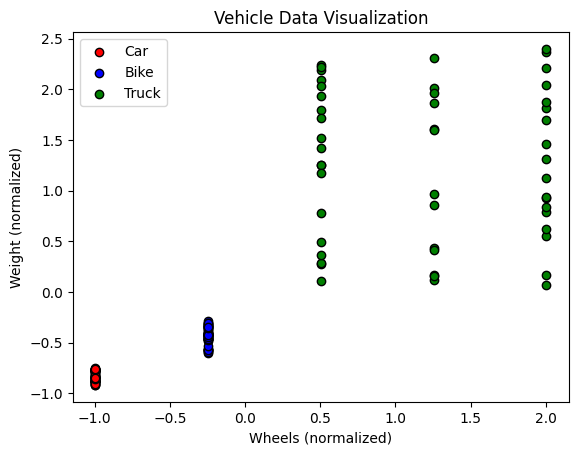


Enter the attributes of the vehicle:

The predicted vehicle type is: Bike


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/vehicle_dataset.csv")

# Preprocess the data (exclude "Has Engine" since all vehicles have engines)
X = df[["Wheels", "Weight"]].values
y = df["Vehicle Type"].values  # Car=0, Bike=1, Truck=2

# Encode the target labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts 'Car', 'Bike', 'Truck' to 0, 1, 2

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fix the train-test split for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

class MultiClassPerceptron:
    def __init__(self, learning_rate, epochs, n_classes):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = None
        self.biases = None

    def activation(self, z):
        """Identity activation for raw scores"""
        return z

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros((self.n_classes, n_features))
        self.biases = np.zeros(self.n_classes)

        # Train one perceptron for each class (one-vs-all)
        for epoch in range(self.epochs):
            for i in range(len(X)):
                for c in range(self.n_classes):
                    # Binary target for class c
                    target = 1 if y[i] == c else 0

                    # Compute the output for class c
                    z = np.dot(X[i], self.weights[c]) + self.biases[c]
                    y_pred = self.activation(z) >= 0  # Heaviside function

                    # Update weights and biases for class c
                    self.weights[c] += self.learning_rate * (target - y_pred) * X[i]
                    self.biases[c] += self.learning_rate * (target - y_pred)

    def predict(self, X):
        scores = np.dot(X, self.weights.T) + self.biases
        return np.argmax(scores, axis=1)

# Initialize and train the perceptron
perceptron = MultiClassPerceptron(learning_rate=0.01, epochs=200, n_classes=3)
perceptron.fit(X_train, y_train)

# Predict and evaluate
y_pred = perceptron.predict(X_test)

# Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualize the dataset (optional)
def visualize_data(X, y):
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label="Car", c="red", edgecolor="k")
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label="Bike", c="blue", edgecolor="k")
    plt.scatter(X[:, 0][y == 2], X[:, 1][y == 2], label="Truck", c="green", edgecolor="k")
    plt.xlabel("Wheels (normalized)")
    plt.ylabel("Weight (normalized)")
    plt.legend()
    plt.title("Vehicle Data Visualization")
    plt.show()

visualize_data(X, y)

# Function to predict a vehicle type based on user input
def predict_vehicle():
    print("\nEnter the attributes of the vehicle:")
    wheels = int(input("Number of wheels: "))
    weight = float(input("Weight: "))

    # Create the input feature array
    input_features = np.array([[wheels, weight]])

    # Normalize the input features
    input_features = scaler.transform(input_features)

    # Predict the vehicle type
    prediction = perceptron.predict(input_features)
    vehicle_type = label_encoder.inverse_transform(prediction)

    print(f"\nThe predicted vehicle type is: {vehicle_type[0]}")

# Call the function to predict a vehicle
predict_vehicle()


single layer perceptron for AND operator

In [ ]:
import numpy as np

def step_function(x):
    return np.where(x > 0, 1, 0)  # Apply step function to an array

class SingleLayerPerceptron:
    def __init__(self, input_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(output_size, input_size)
        self.biases = np.random.rand(output_size)

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights.T) + self.biases
        return step_function(linear_output)

    def train(self, inputs, labels, epochs=1000):
        for _ in range(epochs):
            for input_vector, label_vector in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label_vector - prediction
                self.weights += self.learning_rate * np.outer(error, input_vector)
                self.biases += self.learning_rate * error

# Inputs and labels for AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([[0], [0], [0], [1]])  # AND gate output

# Train perceptron
and_perceptron = SingleLayerPerceptron(input_size=2, output_size=1)
and_perceptron.train(inputs, labels, epochs=1000)

print("AND Gate Predictions:")
for input_vector in inputs:
    print(f"{input_vector} -> {and_perceptron.predict(input_vector)}")


AND Gate Predictions:
[0 0] -> [0]
[0 1] -> [0]
[1 0] -> [0]
[1 1] -> [1]


single layer perceptron for OR operator

In [ ]:
import numpy as np

def step_function(x):
    return np.where(x > 0, 1, 0)  # Apply step function to an array

class SingleLayerPerceptron:
    def __init__(self, input_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(output_size, input_size)
        self.biases = np.random.rand(output_size)

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights.T) + self.biases
        return step_function(linear_output)

    def train(self, inputs, labels, epochs=1000):
        for _ in range(epochs):
            for input_vector, label_vector in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label_vector - prediction
                self.weights += self.learning_rate * np.outer(error, input_vector)
                self.biases += self.learning_rate * error

# Inputs and labels for OR gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([[0], [1], [1], [1]])  # OR gate output

# Train perceptron
or_perceptron = SingleLayerPerceptron(input_size=2, output_size=1)
or_perceptron.train(inputs, labels, epochs=1000)

print("OR Gate Predictions:")
for input_vector in inputs:
    print(f"{input_vector} -> {or_perceptron.predict(input_vector)}")


OR Gate Predictions:
[0 0] -> [0]
[0 1] -> [1]
[1 0] -> [1]
[1 1] -> [1]


Experiment-3
multilayer perceptron for xor dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping

# XOR Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Model Definition
model = Sequential([
    Dense(8, input_dim=2, activation='relu', kernel_initializer=HeNormal()),  # Hidden layer 1
    Dense(4, activation='relu', kernel_initializer=HeNormal()),              # Hidden layer 2
    Dense(1, activation='sigmoid')                                           # Output layer
])

# Compile Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Increased learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)

# Train Model
model.fit(X, Y, epochs=1000, batch_size=2, verbose=0, callbacks=[early_stopping])

# Evaluate Model
loss, accuracy = model.evaluate(X, Y, verbose=0)
print(f"Model Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Test Predictions
predictions = model.predict(X)
print("Predictions:")
for inp, pred in zip(X, predictions):
    print(f"Input: {inp}, Predicted Output: {np.round(pred[0], 2)}")


Model Loss: 0.0001, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predictions:
Input: [0 0], Predicted Output: 0.0
Input: [0 1], Predicted Output: 1.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 0.0


experiment 4 activation function (comparing activation functions)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# XOR Dataset (Non-linearly separable)
X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_XOR = np.array([[0], [1], [1], [0]])

# AND Dataset (Linearly separable)
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_AND = np.array([[0], [0], [0], [1]])

# Function to create and train a model with a given activation function
def build_and_train_model(X, Y, activation, dataset_name):
    print(f"\nTraining with {activation} activation on {dataset_name} dataset")

    # Define the model
    model = Sequential([
        Input(shape=(2,)),
        Dense(8, activation=activation, kernel_initializer=HeNormal()),
        Dense(4, activation=activation, kernel_initializer=HeNormal()),
        Dense(1, activation='sigmoid')  # Output layer uses sigmoid for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X, Y, epochs=500, batch_size=2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X, Y, verbose=0)
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    # Make predictions
    predictions = model.predict(X, verbose=0)
    predictions_binary = (predictions > 0.5).astype(int)

    # Print predictions and classification report
    print("Predictions:")
    for inp, pred, binary in zip(X, predictions, predictions_binary):
        print(f"Input: {inp}, Output: {pred[0]:.4f}, Binary Output: {binary[0]}")

    print("Classification Report:")
    print(classification_report(Y, predictions_binary, target_names=["Class 0", "Class 1"]))

    return accuracy

# Compare activation functions on both datasets
datasets = [("XOR", X_XOR, Y_XOR), ("AND", X_AND, Y_AND)]
activations = ['sigmoid', 'relu', 'tanh']

for dataset_name, X, Y in datasets:
    print(f"\n--- {dataset_name} Dataset ---")
    for activation in activations:
        build_and_train_model(X, Y, activation, dataset_name)



--- XOR Dataset ---

Training with sigmoid activation on XOR dataset
Loss: 0.0646, Accuracy: 1.0000
Predictions:
Input: [0 0], Output: 0.0836, Binary Output: 0
Input: [0 1], Output: 0.9259, Binary Output: 1
Input: [1 0], Output: 0.9940, Binary Output: 1
Input: [1 1], Output: 0.0844, Binary Output: 0
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         2
     Class 1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Training with relu activation on XOR dataset
Loss: 0.0161, Accuracy: 1.0000
Predictions:
Input: [0 0], Output: 0.0311, Binary Output: 0
Input: [0 1], Output: 0.9995, Binary Output: 1
Input: [1 0], Output: 0.9995, Binary Output: 1
Input: [1 1], Output: 0.0311, Binary Output: 0
Classification Report:
              precision    recall  f1-score   s

experiment 5


In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize parameters for a 2-layer neural network
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, Z2, A2)
    return A2, cache

# Compute cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return np.squeeze(cost)

# Backward propagation
def backward_propagation(X, Y, cache, W1, W2):
    m = X.shape[1]
    Z1, A1, Z2, A2 = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# XOR dataset
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # Input features
Y = np.array([[0, 1, 1, 0]])  # Labels

# Neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

# Initialize parameters
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

# Training loop
for epoch in range(epochs):
    # Forward propagation
    A2, cache = forward_propagation(X, W1, b1, W2, b2)

    # Compute cost
    cost = compute_cost(A2, Y)

    # Backward propagation
    dW1, db1, dW2, db2 = backward_propagation(X, Y, cache, W1, W2)

    # Update parameters
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    # Print cost every 1000 iterations
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")

# Final predictions
A2, _ = forward_propagation(X, W1, b1, W2, b2)
predictions = (A2 > 0.5).astype(int)
print("\nPredictions:")
print(predictions)


Epoch 0, Cost: 0.6931
Epoch 1000, Cost: 0.6931
Epoch 2000, Cost: 0.6931
Epoch 3000, Cost: 0.6931
Epoch 4000, Cost: 0.6931
Epoch 5000, Cost: 0.6931
Epoch 6000, Cost: 0.6931
Epoch 7000, Cost: 0.6931
Epoch 8000, Cost: 0.6931
Epoch 9000, Cost: 0.6931

Predictions:
[[0 1 0 1]]
